## Kaggle – DataTops®
Luismi ha decidido cambiar de aires y, por eso, ha comprado una tienda de portátiles. Sin embargo, su única especialidad es Data Science, por lo que ha decidido crear un modelo de ML para establecer los mejores precios.

¿Podrías ayudar a Luismi a mejorar ese modelo?

## Métrica: 
Error de raíz cuadrada media (RMSE) es la desviación estándar de los valores residuales (errores de predicción). Los valores residuales son una medida de la distancia de los puntos de datos de la línea de regresión; RMSE es una medida de cuál es el nivel de dispersión de estos valores residuales. En otras palabras, le indica el nivel de concentración de los datos en la línea de mejor ajuste.


$$ RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}$$


## Librerías

In [341]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import urllib.request
import bootcampviztools as bt
import funciones as fs
import seaborn as sns
import re

## Datos

In [342]:
# Para que funcione necesitas bajarte los archivos de datos de Kaggle 
df = pd.read_csv("./data/train.csv", index_col= 0)
df.index.name = None

## Exploración de los datos

In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    object 
 1   Product           912 non-null    object 
 2   TypeName          912 non-null    object 
 3   Inches            912 non-null    float64
 4   ScreenResolution  912 non-null    object 
 5   Cpu               912 non-null    object 
 6   Ram               912 non-null    object 
 7   Memory            912 non-null    object 
 8   Gpu               912 non-null    object 
 9   OpSys             912 non-null    object 
 10  Weight            912 non-null    object 
 11  Price_in_euros    912 non-null    float64
dtypes: float64(2), object(10)
memory usage: 92.6+ KB


In [344]:
df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00
618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01
909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00
...,...,...,...,...,...,...,...,...,...,...,...,...
28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,800.00
1160,HP,Spectre Pro,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.48kg,1629.00
78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,No OS,2.2kg,519.00
23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,No OS,1.86kg,258.00


In [345]:
df.Company.value_counts()

Company
Lenovo       202
Dell         197
HP           194
Asus         121
Acer          74
MSI           37
Toshiba       34
Apple         17
Razer          6
Mediacom       6
Microsoft      5
Samsung        5
Xiaomi         3
Vero           2
Huawei         2
Google         2
Chuwi          2
Fujitsu        2
LG             1
Name: count, dtype: int64

In [346]:
# Clasificación de gama según la marca
gama_marca = {
    "Chuwi": "Gama Baja", "Mediacom": "Gama Baja", "Acer": "Gama Baja", "Vero": "Gama Baja",
    "Asus": "Gama Media", "HP": "Gama Media", "Dell": "Gama Media", "Lenovo": "Gama Media",
    "Huawei": "Gama Media", "Xiaomi": "Gama Media", "Toshiba": "Gama Media", "Samsung": "Gama Media",
    "Fujitsu": "Gama Media", "LG": "Gama Media",
    "MSI": "Gama Alta", "Razer": "Gama Alta", "Microsoft": "Gama Alta", "Google": "Gama Alta",
    "Apple": "Gama Premium"
}

# Crear columna 'Gama' usando el diccionario gama_marca
df['Gama'] = df["Company"].map(gama_marca)

In [347]:
# 1️⃣ Convertir nombres de columnas a minúsculas y eliminar espacios
df.columns = df.columns.str.strip().str.lower()

# 2️⃣ Limpiar espacios extra y convertir valores de texto a minúsculas
df = df.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)

# 3️⃣ Reemplazar caracteres especiales (como "<U+039C>" en GPU)
df['gpu'] = df['gpu'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)

# 4️⃣ Convertir la columna 'price_in_euros' a numérica
df['price_in_euros'] = pd.to_numeric(df['price_in_euros'], errors='coerce')

# Mostrar primeras filas para verificar limpieza
print(df.head())


    company        product   typename  inches   screenresolution  \
755      hp         250 g6   notebook    15.6  full hd 1920x1080   
618    dell  inspiron 7559     gaming    15.6  full hd 1920x1080   
909      hp    probook 450   notebook    15.6  full hd 1920x1080   
2     apple    macbook air  ultrabook    13.3           1440x900   
286    dell  inspiron 3567   notebook    15.6  full hd 1920x1080   

                             cpu   ram               memory  \
755     intel core i3 6006u 2ghz   8gb            256gb ssd   
618  intel core i7 6700hq 2.6ghz  16gb              1tb hdd   
909   intel core i7 7500u 2.7ghz   8gb              1tb hdd   
2           intel core i5 1.8ghz   8gb  128gb flash storage   
286   intel core i3 6006u 2.0ghz   4gb              1tb hdd   

                             gpu       opsys  weight  price_in_euros  \
755        intel hd graphics 520  windows 10  1.86kg          539.00   
618  nvidia geforce gtx 960u039c  windows 10  2.59kg          879.01

C:\Users\josel\AppData\Local\Temp\ipykernel_17864\2503989374.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)


In [348]:
fs.describe_df(df)

COL_N,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_in_euros,gama
DATA_TYPE,object,object,object,float64,object,object,object,object,object,object,object,float64,object
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,19,447,6,17,36,105,9,37,89,9,165,603,4
CARDIN (%),0.02,0.49,0.01,0.02,0.04,0.12,0.01,0.04,0.1,0.01,0.18,0.66,0.0


In [349]:
df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_in_euros,gama
755,hp,250 g6,notebook,15.6,full hd 1920x1080,intel core i3 6006u 2ghz,8gb,256gb ssd,intel hd graphics 520,windows 10,1.86kg,539.00,gama media
618,dell,inspiron 7559,gaming,15.6,full hd 1920x1080,intel core i7 6700hq 2.6ghz,16gb,1tb hdd,nvidia geforce gtx 960u039c,windows 10,2.59kg,879.01,gama media
909,hp,probook 450,notebook,15.6,full hd 1920x1080,intel core i7 7500u 2.7ghz,8gb,1tb hdd,nvidia geforce 930mx,windows 10,2.04kg,900.00,gama media
2,apple,macbook air,ultrabook,13.3,1440x900,intel core i5 1.8ghz,8gb,128gb flash storage,intel hd graphics 6000,macos,1.34kg,898.94,gama premium
286,dell,inspiron 3567,notebook,15.6,full hd 1920x1080,intel core i3 6006u 2.0ghz,4gb,1tb hdd,amd radeon r5 m430,linux,2.25kg,428.00,gama media


In [350]:
df.tail()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_in_euros,gama
28,dell,inspiron 5570,notebook,15.6,full hd 1920x1080,intel core i5 8250u 1.6ghz,8gb,256gb ssd,amd radeon 530,windows 10,2.2kg,800.00,gama media
1160,hp,spectre pro,2 in 1 convertible,13.3,full hd / touchscreen 1920x1080,intel core i5 6300u 2.4ghz,8gb,256gb ssd,intel hd graphics 520,windows 10,1.48kg,1629.00,gama media
78,lenovo,ideapad 320-15ikbn,notebook,15.6,full hd 1920x1080,intel core i5 7200u 2.5ghz,8gb,2tb hdd,intel hd graphics 620,no os,2.2kg,519.00,gama media
23,hp,255 g6,notebook,15.6,1366x768,amd e-series e2-9000e 1.5ghz,4gb,500gb hdd,amd radeon r2,no os,1.86kg,258.00,gama media
229,dell,alienware 17,gaming,17.3,ips panel full hd 1920x1080,intel core i7 7700hq 2.8ghz,16gb,256gb ssd + 1tb hdd,nvidia geforce gtx 1060,windows 10,4.42kg,2456.34,gama media


In [351]:
df.describe()

,inches,price_in_euros
count,912.000000,912.000000
mean,14.981579,1111.724090
std,1.436719,687.959172
min,10.100000,174.000000
25%,14.000000,589.000000
50%,15.600000,978.000000
75%,15.600000,1483.942500
max,18.400000,6099.000000


| **Variable**         | **Descripción**                                                                        |
|----------------------|----------------------------------------------------------------------------------------|
| Company              | Marca del portátil                                                                     |
| Product              | Modelo del portátil                                                                    |
| TypeName             | Tipo de portátil (Notebook, Gaming, Ultrabook, etc.)                                   |
| Inches               | Tamaño de la pantalla en pulgadas                                                      |
| ScreenResolution     | Resolución de la pantalla                                                              |
| Cpu                  | Procesador del portátil                                                                |
| Ram                  | Memoria RAM del portátil                                                               |
| Memory               | Capacidad de almacenamiento (SSD, HDD, Flash Storage, etc.)                            |
| Gpu                  | Tarjeta gráfica del portátil                                                           |
| OpSys                | Sistema operativo del portátil                                                         |
| Weight               | Peso del portátil en kilogramos                                                        |
| Price_in_euros       | Precio del portátil en euros                                                           |


Sin embargo, basándome en la experiencia y el conocimiento del mercado, algunas variables que generalmente tienen un gran impacto en el precio son:

Marca: Algunas marcas son percibidas como de mayor calidad y, por lo tanto, tienen precios más altos (por ejemplo, Apple).

Tipo de portátil: Los portátiles para juegos (Gaming) y los ultrabooks tienden a ser más caros debido a sus características especializadas.

Procesador (Cpu): Los procesadores más potentes (por ejemplo, Intel Core i7, i9) suelen aumentar el precio del equipo.

Memoria RAM (Ram): Más memoria RAM generalmente significa un precio más alto, especialmente si supera los 8GB.

Capacidad de almacenamiento (Memory): Los SSD suelen ser más caros que los HDD, y una mayor capacidad de almacenamiento generalmente aumenta el precio.

Tarjeta gráfica (Gpu): Las tarjetas gráficas dedicadas y de alta gama (por ejemplo, Nvidia GeForce GTX/RTX) pueden incrementar significativamente el precio.

Resolución y tipo de pantalla (ScreenResolution): Pantallas de alta resolución y características adicionales como la tecnología IPS o pantallas táctiles pueden aumentar el precio.

Sistema operativo (OpSys): Los equipos con sistemas operativos preinstalados, especialmente macOS, pueden ser más costosos.

Peso (Weight): Si bien no es una variable directa del precio, los portátiles más livianos y portátiles tienden a ser más caros debido a la tecnología avanzada utilizada para reducir el peso.

In [352]:
target = "price_in_euros"

<Axes: xlabel='price_in_euros', ylabel='Count'>

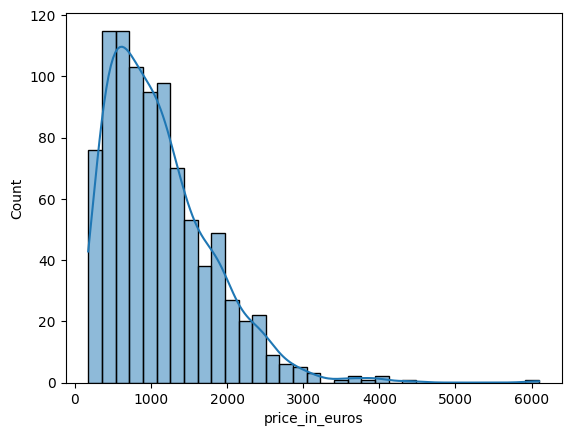

In [353]:
sns.histplot(x= target, data=df, kde=True)

In [354]:
df[df[target] > 1500].sort_values(by=target)

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_in_euros,gama
526,asus,fx753ve-gc155t (i7-7700hq/16gb/1tb,gaming,17.3,full hd 1920x1080,intel core i7 7700hq 2.8ghz,16gb,256gb ssd + 1tb hdd,nvidia geforce gtx1050 ti,windows 10,3kg,1504.00,gama media
83,apple,"macbook 12""",ultrabook,12.0,ips panel retina display 2304x1440,intel core i5 1.3ghz,8gb,512gb ssd,intel hd graphics 615,macos,0.92kg,1510.00,gama premium
1121,msi,ge72 apache,gaming,17.3,full hd 1920x1080,intel core i7 6700hq 2.6ghz,8gb,128gb ssd + 1tb hdd,nvidia geforce gtx 960m,windows 10,2.9kg,1511.19,gama alta
1137,hp,elitebook 1040,notebook,14.0,full hd 1920x1080,intel core i5 6200u 2.3ghz,8gb,256gb ssd,intel hd graphics 520,windows 7,1.43kg,1513.00,gama media
16,apple,macbook pro,ultrabook,13.3,ips panel retina display 2560x1600,intel core i5 2.3ghz,8gb,256gb ssd,intel iris plus graphics 640,macos,1.37kg,1518.55,gama premium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,asus,rog g703vi-e5062t,gaming,17.3,full hd 1920x1080,intel core i7 7820hk 2.9ghz,32gb,512gb ssd + 1tb hdd,nvidia geforce gtx 1080,windows 10,4.7kg,3890.00,gama media
1151,hp,zbook 17,workstation,17.3,ips panel full hd 1920x1080,intel core i7 6700hq 2.6ghz,8gb,256gb ssd,nvidia quadro m3000m,windows 7,3kg,3949.40,gama media
1081,asus,rog g701vo,gaming,17.3,ips panel full hd 1920x1080,intel core i7 6820hk 2.7ghz,64gb,1tb ssd,nvidia geforce gtx 980,windows 10,3.58kg,3975.00,gama media
758,hp,zbook 17,workstation,17.3,ips panel full hd 1920x1080,intel xeon e3-1535m v5 2.9ghz,16gb,256gb ssd,nvidia quadro m2000m,windows 7,3kg,4389.00,gama media


In [355]:
df

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_in_euros,gama
755,hp,250 g6,notebook,15.6,full hd 1920x1080,intel core i3 6006u 2ghz,8gb,256gb ssd,intel hd graphics 520,windows 10,1.86kg,539.00,gama media
618,dell,inspiron 7559,gaming,15.6,full hd 1920x1080,intel core i7 6700hq 2.6ghz,16gb,1tb hdd,nvidia geforce gtx 960u039c,windows 10,2.59kg,879.01,gama media
909,hp,probook 450,notebook,15.6,full hd 1920x1080,intel core i7 7500u 2.7ghz,8gb,1tb hdd,nvidia geforce 930mx,windows 10,2.04kg,900.00,gama media
2,apple,macbook air,ultrabook,13.3,1440x900,intel core i5 1.8ghz,8gb,128gb flash storage,intel hd graphics 6000,macos,1.34kg,898.94,gama premium
286,dell,inspiron 3567,notebook,15.6,full hd 1920x1080,intel core i3 6006u 2.0ghz,4gb,1tb hdd,amd radeon r5 m430,linux,2.25kg,428.00,gama media
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,dell,inspiron 5570,notebook,15.6,full hd 1920x1080,intel core i5 8250u 1.6ghz,8gb,256gb ssd,amd radeon 530,windows 10,2.2kg,800.00,gama media
1160,hp,spectre pro,2 in 1 convertible,13.3,full hd / touchscreen 1920x1080,intel core i5 6300u 2.4ghz,8gb,256gb ssd,intel hd graphics 520,windows 10,1.48kg,1629.00,gama media
78,lenovo,ideapad 320-15ikbn,notebook,15.6,full hd 1920x1080,intel core i5 7200u 2.5ghz,8gb,2tb hdd,intel hd graphics 620,no os,2.2kg,519.00,gama media
23,hp,255 g6,notebook,15.6,1366x768,amd e-series e2-9000e 1.5ghz,4gb,500gb hdd,amd radeon r2,no os,1.86kg,258.00,gama media


## Procesado de datos

Nuestro target es la columna `Price_in_euros`

In [356]:
df["inches"] = df.inches.astype(float)
df['ram_gb'] = df['ram'].str.replace('gb', '').astype(int)
df["weight_kg"] = df['weight'].str.replace('kg', '').astype(float)

In [357]:
# ScreenResolucion contine informacion de si la pantalla es Tactil (Touchscreen) y el tamaño de la pantalla. 

# Función para detectar si es Touchscreen
def es_touchscreen(x):
    return 'Touchscreen' in x

# Crear columna Touchscreen
df['touchscreen'] = df['screenresolution'].apply(es_touchscreen)

# Función para extraer solo la resolución de pantalla
def extract_resolution(x):
    if 'touchscreen' in x:
        return x.split(' / ')[-1]
    else:
        return x

# Crear columna con solo la resolución de pantalla
df['screenresolution'] = df['screenresolution'].apply(extract_resolution)

In [358]:
# Analizamos vemos en Memoria que 1.0TB HDD==1TB HDD, vamos a quitar el punto para evitar duplicidades.
# Quitar los puntos en la columna 'Storage'
df['memory'] = df['memory'].str.replace('1.0', '1', regex=False)

In [359]:
# Quitar los espacios extras en la columna 'Gpu'
df['gpu'] = df['gpu'].str.strip()

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           912 non-null    object 
 1   product           912 non-null    object 
 2   typename          912 non-null    object 
 3   inches            912 non-null    float64
 4   screenresolution  912 non-null    object 
 5   cpu               912 non-null    object 
 6   ram               912 non-null    object 
 7   memory            912 non-null    object 
 8   gpu               912 non-null    object 
 9   opsys             912 non-null    object 
 10  weight            912 non-null    object 
 11  price_in_euros    912 non-null    float64
 12  gama              912 non-null    object 
 13  ram_gb            912 non-null    int32  
 14  weight_kg         912 non-null    float64
 15  touchscreen       912 non-null    bool   
dtypes: bool(1), float64(3), int32(1), object(11)
me

In [361]:
target = "price_in_euros"
features_num = df.select_dtypes(include=[np.number]).columns.tolist()
features_num.remove(target)
features_num

['inches', 'ram_gb', 'weight_kg']

<Axes: xlabel='inches', ylabel='Count'>

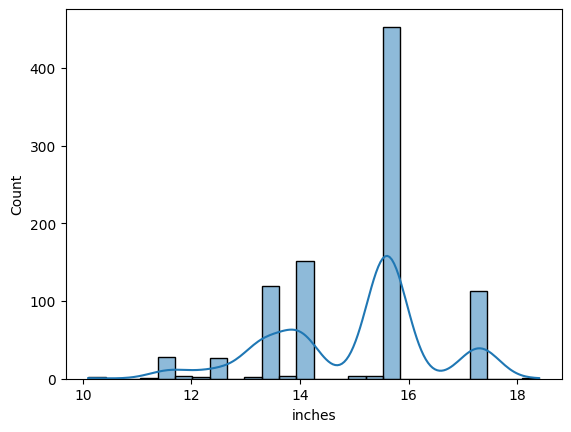

In [362]:
sns.histplot(x= "inches", data=df, kde=True)

In [363]:
# inches es una variable categorica

<Axes: xlabel='ram_gb', ylabel='Count'>

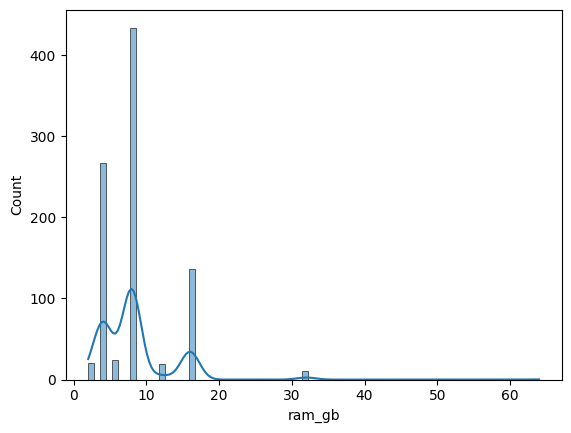

In [364]:
sns.histplot(x= "ram_gb", data=df, kde=True)

In [365]:
# ram_gb es variable categorica

(2,)


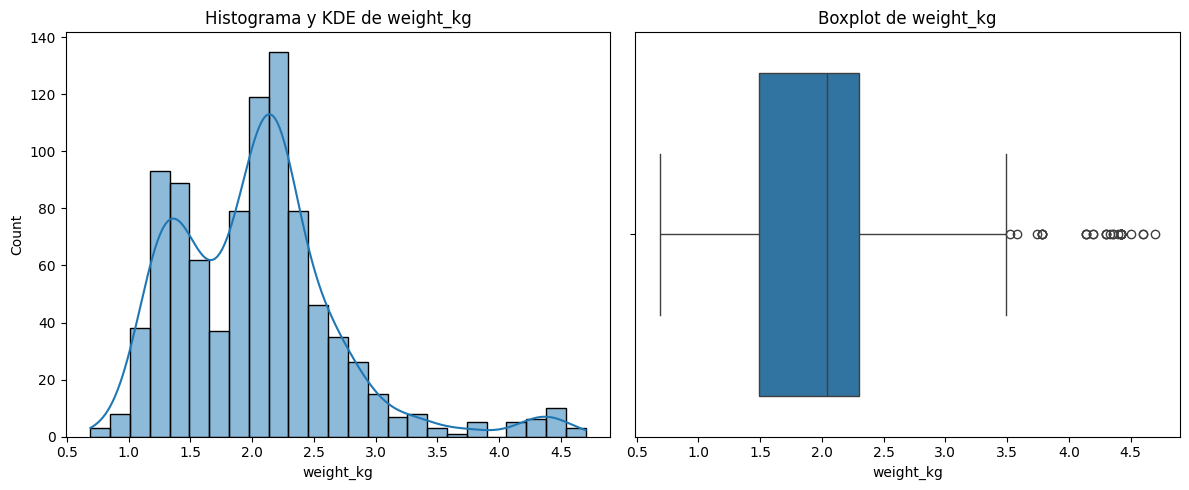

In [366]:
bt.plot_combined_graphs(df, ["weight_kg"])

In [367]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix[target].sort_values()

inches            0.071043
weight_kg         0.197086
ram_gb            0.738922
price_in_euros    1.000000
touchscreen            NaN
Name: price_in_euros, dtype: float64

In [368]:
features_cat = df.select_dtypes(include=[object]).columns.tolist()
features_cat.remove("ram")
features_cat.remove("weight")
features_cat.append("touchscreen")
features_cat

['company',
 'product',
 'typename',
 'screenresolution',
 'cpu',
 'memory',
 'gpu',
 'opsys',
 'gama',
 'touchscreen']

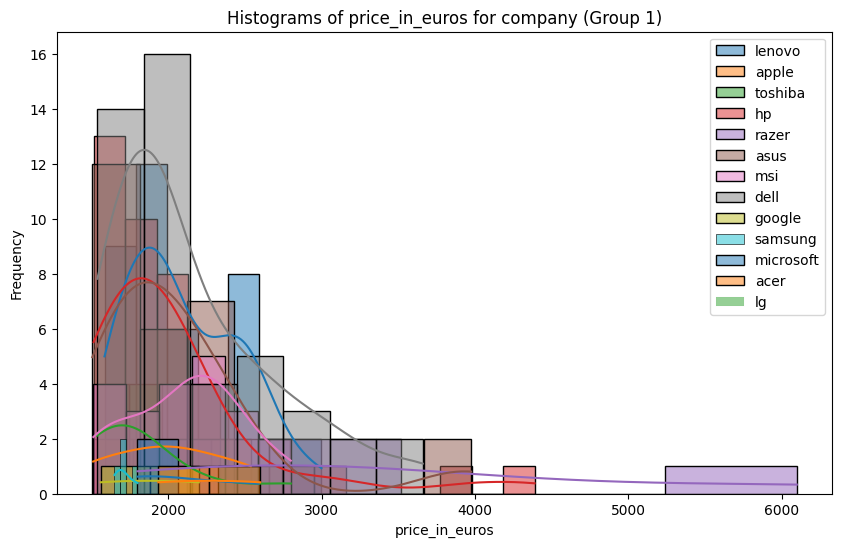

In [369]:
bt.plot_grouped_histograms(df[df[target]>1500], cat_col="company", num_col=target, group_size=len(df["company"].unique()))

In [370]:
df

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_in_euros,gama,ram_gb,weight_kg,touchscreen
755,hp,250 g6,notebook,15.6,full hd 1920x1080,intel core i3 6006u 2ghz,8gb,256gb ssd,intel hd graphics 520,windows 10,1.86kg,539.00,gama media,8,1.86,False
618,dell,inspiron 7559,gaming,15.6,full hd 1920x1080,intel core i7 6700hq 2.6ghz,16gb,1tb hdd,nvidia geforce gtx 960u039c,windows 10,2.59kg,879.01,gama media,16,2.59,False
909,hp,probook 450,notebook,15.6,full hd 1920x1080,intel core i7 7500u 2.7ghz,8gb,1tb hdd,nvidia geforce 930mx,windows 10,2.04kg,900.00,gama media,8,2.04,False
2,apple,macbook air,ultrabook,13.3,1440x900,intel core i5 1.8ghz,8gb,128gb flash storage,intel hd graphics 6000,macos,1.34kg,898.94,gama premium,8,1.34,False
286,dell,inspiron 3567,notebook,15.6,full hd 1920x1080,intel core i3 6006u 2.0ghz,4gb,1tb hdd,amd radeon r5 m430,linux,2.25kg,428.00,gama media,4,2.25,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,dell,inspiron 5570,notebook,15.6,full hd 1920x1080,intel core i5 8250u 1.6ghz,8gb,256gb ssd,amd radeon 530,windows 10,2.2kg,800.00,gama media,8,2.20,False
1160,hp,spectre pro,2 in 1 convertible,13.3,touchscreen 1920x1080,intel core i5 6300u 2.4ghz,8gb,256gb ssd,intel hd graphics 520,windows 10,1.48kg,1629.00,gama media,8,1.48,False
78,lenovo,ideapad 320-15ikbn,notebook,15.6,full hd 1920x1080,intel core i5 7200u 2.5ghz,8gb,2tb hdd,intel hd graphics 620,no os,2.2kg,519.00,gama media,8,2.20,False
23,hp,255 g6,notebook,15.6,1366x768,amd e-series e2-9000e 1.5ghz,4gb,500gb hdd,amd radeon r2,no os,1.86kg,258.00,gama media,4,1.86,False


In [371]:
# Convertimos las variables categoricas en dummies:

categorias_gd = features_cat


df_transformado = pd.get_dummies(df, columns=categorias_gd)

In [372]:
# Escalamos las variables numericas:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_transformado[features_num] = scaler.fit_transform(df_transformado[features_num])

In [373]:
df_transformado = df_transformado.drop(columns=["ram", "weight"])

In [374]:
df_transformado.head()

,inches,price_in_euros,ram_gb,weight_kg,company_acer,company_apple,company_asus,company_chuwi,company_dell,company_fujitsu,...,opsys_macos,opsys_no os,opsys_windows 10,opsys_windows 10 s,opsys_windows 7,gama_gama alta,gama_gama baja,gama_gama media,gama_gama premium,touchscreen_False
755,0.430676,539.00,-0.052193,-0.250996,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
618,0.430676,879.01,1.534472,0.846582,False,False,False,False,True,False,...,False,False,True,False,False,False,False,True,False,True
909,0.430676,900.00,-0.052193,0.019640,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
2,-1.171072,898.94,-0.052193,-1.032831,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,True,True
286,0.430676,428.00,-0.845526,0.335381,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,True


In [375]:
import pandas as pd

# Supongamos que df es tu DataFrame

# Función para identificar nombres de columnas problemáticos
def find_problematic_columns(columns):
    problematic_columns = [col for col in columns if any(char in col for char in ['[', ']', '<'])]
    return problematic_columns

# Identificar nombres de columnas problemáticos
problematic_columns = find_problematic_columns(df_transformado.columns)

print(f"Nombres de columnas problemáticos: {problematic_columns}")


Nombres de columnas problemáticos: []


## Modelado

### 1. Definir X e y

In [376]:
X = df_transformado.drop(['price_in_euros'], axis=1)
y = df_transformado['price_in_euros'].copy()
X.shape

(912, 749)

In [377]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Columns: 749 entries, inches to touchscreen_False
dtypes: bool(746), float64(3)
memory usage: 692.9 KB


In [378]:
X.shape

(912, 749)

In [379]:
y.shape

(912,)

In [380]:
y

755      539.00
618      879.01
909      900.00
2        898.94
286      428.00
         ...   
28       800.00
1160    1629.00
78       519.00
23       258.00
229     2456.34
Name: price_in_euros, Length: 912, dtype: float64

### 2. Dividir X_train, X_test, y_train, y_test

In [381]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [382]:
X_train

,inches,ram_gb,weight_kg,company_acer,company_apple,company_asus,company_chuwi,company_dell,company_fujitsu,company_google,...,opsys_macos,opsys_no os,opsys_windows 10,opsys_windows 10 s,opsys_windows 7,gama_gama alta,gama_gama baja,gama_gama media,gama_gama premium,touchscreen_False
1118,1.614577,-0.052193,1.463029,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
153,0.430676,1.534472,0.801476,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,True
275,-1.171072,-0.052193,-0.987726,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,True
1100,-0.683584,-0.845526,-0.732125,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
131,1.614577,1.534472,1.162323,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,-0.683584,-0.052193,-0.130713,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
996,0.430676,-0.448859,0.260205,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
770,-1.728202,1.534472,-1.273396,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,True
407,0.430676,-0.845526,0.260205,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True


In [383]:
X_test

,inches,ram_gb,weight_kg,company_acer,company_apple,company_asus,company_chuwi,company_dell,company_fujitsu,company_google,...,opsys_macos,opsys_no os,opsys_windows 10,opsys_windows 10 s,opsys_windows 7,gama_gama alta,gama_gama baja,gama_gama media,gama_gama premium,touchscreen_False
451,0.430676,-0.052193,0.260205,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
802,0.430676,-0.052193,0.079781,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
723,-0.683584,-0.052193,-0.235960,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
682,-0.683584,-0.845526,-0.596808,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
1306,0.430676,-0.845526,0.260205,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0.430676,-0.052193,-0.250996,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
626,-2.354973,-0.845526,-1.168149,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
416,-2.354973,-1.242192,-1.318502,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
546,-0.683584,-0.052193,-0.235960,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True


In [384]:
y_train

1118    2899.00
153     1249.26
275     1958.90
1100    1030.99
131     1396.00
         ...   
578      389.00
996      549.00
770     1859.00
407      306.00
418     1943.00
Name: price_in_euros, Length: 729, dtype: float64

In [385]:
y_test

451     1099.00
802      959.00
723      857.07
682      699.00
1306     369.00
         ...   
369      639.00
626      379.00
416      304.45
546      859.00
260      949.00
Name: price_in_euros, Length: 183, dtype: float64

### 3. Baseline de modelos


In [386]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor



model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6)
model.fit(X_train, y_train)

# Definir los parámetros para GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [6, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Definir GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Ajustar GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
print(f"Mejores parámetros encontrados: {grid_search.best_params_}")

# Actualizar el modelo con los mejores parámetros
model = grid_search.best_estimator_


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Mejores parámetros encontrados: {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 300}


In [387]:
model = XGBRegressor(n_estimators=300, learning_rate=0.2, max_depth=6)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [388]:
X_test

,inches,ram_gb,weight_kg,company_acer,company_apple,company_asus,company_chuwi,company_dell,company_fujitsu,company_google,...,opsys_macos,opsys_no os,opsys_windows 10,opsys_windows 10 s,opsys_windows 7,gama_gama alta,gama_gama baja,gama_gama media,gama_gama premium,touchscreen_False
451,0.430676,-0.052193,0.260205,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
802,0.430676,-0.052193,0.079781,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
723,-0.683584,-0.052193,-0.235960,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
682,-0.683584,-0.845526,-0.596808,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
1306,0.430676,-0.845526,0.260205,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0.430676,-0.052193,-0.250996,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
626,-2.354973,-0.845526,-1.168149,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
416,-2.354973,-1.242192,-1.318502,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
546,-0.683584,-0.052193,-0.235960,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True


In [389]:
y_pred = model.predict(X_test)

In [390]:
y_pred = y_pred

### 4. Sacar métricas, valorar los modelos 

Recuerda que en la competición se va a evaluar con la métrica de ``RMSE``.

In [391]:
RMSE = root_mean_squared_error(y_test, y_pred)
print(RMSE)

338.2562219640692


-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir ``test.csv``

**RECUERDA: APLICAR LAS TRANSFORMACIONES QUE HAYAS REALIZADO EN `train.csv` a `test.csv`.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

### 1. Carga los datos de `test.csv` para predecir.


In [392]:
X_pred = pd.read_csv("data/test.csv", index_col=0)
X_pred.index.name = None
X_pred.head()


,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
209,Lenovo,Legion Y520-15IKBN,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1060,No OS,2.4kg
1281,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg
1168,Lenovo,V110-15ISK (i3-6006U/4GB/1TB/No,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,Intel HD Graphics 520,No OS,1.9kg
1231,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.191kg
1020,HP,ProBook 640,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.95kg


In [393]:
X_pred['Gama'] = X_pred["Company"].map(gama_marca)

In [394]:
X_pred["Cpu"].sort_values().unique().tolist()

['AMD A10-Series 9600P 2.4GHz',
 'AMD A10-Series 9620P 2.5GHz',
 'AMD A12-Series 9700P 2.5GHz',
 'AMD A12-Series 9720P 2.7GHz',
 'AMD A12-Series 9720P 3.6GHz',
 'AMD A4-Series 7210 2.2GHz',
 'AMD A6-Series 9220 2.5GHz',
 'AMD A8-Series 7410 2.2GHz',
 'AMD A9-Series 9410 2.9GHz',
 'AMD A9-Series 9420 3GHz',
 'AMD E-Series 7110 1.8GHz',
 'AMD E-Series 9000 2.2GHz',
 'AMD FX 8800P 2.1GHz',
 'AMD Ryzen 1700 3GHz',
 'Intel Atom X5-Z8350 1.44GHz',
 'Intel Atom x5-Z8550 1.44GHz',
 'Intel Celeron Dual Core 3205U 1.5GHz',
 'Intel Celeron Dual Core N3050 1.6GHz',
 'Intel Celeron Dual Core N3060 1.60GHz',
 'Intel Celeron Dual Core N3060 1.6GHz',
 'Intel Celeron Dual Core N3350 1.1GHz',
 'Intel Celeron Dual Core N3350 2GHz',
 'Intel Celeron Quad Core N3450 1.1GHz',
 'Intel Core M 1.1GHz',
 'Intel Core M 1.2GHz',
 'Intel Core M 6Y30 0.9GHz',
 'Intel Core M 6Y75 1.2GHz',
 'Intel Core i3 6006U 2.0GHz',
 'Intel Core i3 6006U 2GHz',
 'Intel Core i3 6100U 2.3GHz',
 'Intel Core i3 7100U 2.4GHz',
 'Intel 

In [395]:
# 1️⃣ Convertir nombres de columnas a minúsculas y eliminar espacios
X_pred.columns = X_pred.columns.str.strip().str.lower()

# 2️⃣ Limpiar espacios extra y convertir valores de texto a minúsculas
X_pred = X_pred.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)

# 3️⃣ Reemplazar caracteres especiales (como "<U+039C>" en GPU)
X_pred['gpu'] = X_pred['gpu'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)

# 4️⃣ Convertir la columna 'price_in_euros' a numérica
#X_pred['price_in_euros'] = pd.to_numeric(X_pred['price_in_euros'], errors='coerce')

X_pred["inches"] = X_pred.inches.astype(float)
X_pred['ram_gb'] = X_pred['ram'].str.replace('gb', '').astype(int)
X_pred["weight_kg"] = X_pred['weight'].str.replace('kg', '').astype(float)
X_pred['touchscreen'] = X_pred['screenresolution'].apply(es_touchscreen)
X_pred['screenresolution'] = X_pred['screenresolution'].apply(extract_resolution)
X_pred['memory'] = X_pred['memory'].str.replace('1.0', '1', regex=False)
X_pred['gpu'] = X_pred['gpu'].str.strip()


C:\Users\josel\AppData\Local\Temp\ipykernel_17864\3455819747.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_pred = X_pred.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)


In [396]:
categorias_gd = features_cat


X_pred_transformado = pd.get_dummies(X_pred, columns=categorias_gd)
X_pred_transformado[features_num] = scaler.fit_transform(X_pred_transformado[features_num])

In [397]:
X_pred_transformado

,inches,ram,weight,ram_gb,weight_kg,company_acer,company_apple,company_asus,company_chuwi,company_dell,...,opsys_macos,opsys_no os,opsys_windows 10,opsys_windows 10 s,opsys_windows 7,gama_gama alta,gama_gama baja,gama_gama media,gama_gama premium,touchscreen_False
209,0.357415,16gb,2.4kg,1.420931,0.502123,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,True
1281,0.357415,4gb,2.4kg,-0.902069,0.502123,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
1168,0.357415,4gb,1.9kg,-0.902069,-0.250117,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,True
1231,0.357415,8gb,2.191kg,-0.127735,0.187687,False,False,False,False,True,...,False,False,True,False,False,False,False,True,False,True
1020,-0.786899,4gb,1.95kg,-0.902069,-0.174893,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,1.573249,16gb,2.9kg,1.420931,1.254364,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True
948,-0.786899,4gb,1.47kg,-0.902069,-0.897044,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
483,0.357415,8gb,1.78kg,-0.127735,-0.430655,False,False,False,False,True,...,False,False,True,False,False,False,False,True,False,True
1017,-0.786899,4gb,1.64kg,-0.902069,-0.641282,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True


In [398]:
X_pred_transformado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 209 to 421
Columns: 480 entries, inches to touchscreen_False
dtypes: bool(475), float64(3), object(2)
memory usage: 199.7+ KB


In [399]:
X_pred_transformado


,inches,ram,weight,ram_gb,weight_kg,company_acer,company_apple,company_asus,company_chuwi,company_dell,...,opsys_macos,opsys_no os,opsys_windows 10,opsys_windows 10 s,opsys_windows 7,gama_gama alta,gama_gama baja,gama_gama media,gama_gama premium,touchscreen_False
209,0.357415,16gb,2.4kg,1.420931,0.502123,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,True
1281,0.357415,4gb,2.4kg,-0.902069,0.502123,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
1168,0.357415,4gb,1.9kg,-0.902069,-0.250117,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,True
1231,0.357415,8gb,2.191kg,-0.127735,0.187687,False,False,False,False,True,...,False,False,True,False,False,False,False,True,False,True
1020,-0.786899,4gb,1.95kg,-0.902069,-0.174893,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,1.573249,16gb,2.9kg,1.420931,1.254364,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True
948,-0.786899,4gb,1.47kg,-0.902069,-0.897044,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
483,0.357415,8gb,1.78kg,-0.127735,-0.430655,False,False,False,False,True,...,False,False,True,False,False,False,False,True,False,True
1017,-0.786899,4gb,1.64kg,-0.902069,-0.641282,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True


In [400]:
X_train


,inches,ram_gb,weight_kg,company_acer,company_apple,company_asus,company_chuwi,company_dell,company_fujitsu,company_google,...,opsys_macos,opsys_no os,opsys_windows 10,opsys_windows 10 s,opsys_windows 7,gama_gama alta,gama_gama baja,gama_gama media,gama_gama premium,touchscreen_False
1118,1.614577,-0.052193,1.463029,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
153,0.430676,1.534472,0.801476,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,True
275,-1.171072,-0.052193,-0.987726,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,True
1100,-0.683584,-0.845526,-0.732125,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
131,1.614577,1.534472,1.162323,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,-0.683584,-0.052193,-0.130713,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
996,0.430676,-0.448859,0.260205,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
770,-1.728202,1.534472,-1.273396,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,True
407,0.430676,-0.845526,0.260205,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True


In [401]:
# Columnas de X_pred debe coincidir con X_train y los valores se rellenan a False
X_pred_transformado = X_pred_transformado.reindex(columns=X_train.columns, fill_value=False)

In [402]:
X_pred_transformado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 209 to 421
Columns: 749 entries, inches to touchscreen_False
dtypes: bool(746), float64(3)
memory usage: 297.1 KB


In [403]:
X_train

,inches,ram_gb,weight_kg,company_acer,company_apple,company_asus,company_chuwi,company_dell,company_fujitsu,company_google,...,opsys_macos,opsys_no os,opsys_windows 10,opsys_windows 10 s,opsys_windows 7,gama_gama alta,gama_gama baja,gama_gama media,gama_gama premium,touchscreen_False
1118,1.614577,-0.052193,1.463029,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
153,0.430676,1.534472,0.801476,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,True
275,-1.171072,-0.052193,-0.987726,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,True
1100,-0.683584,-0.845526,-0.732125,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
131,1.614577,1.534472,1.162323,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,-0.683584,-0.052193,-0.130713,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
996,0.430676,-0.448859,0.260205,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
770,-1.728202,1.534472,-1.273396,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,True
407,0.430676,-0.845526,0.260205,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True


 ## 2. Replicar el procesado para ``test.csv``

In [404]:
X_pred_transformado

,inches,ram_gb,weight_kg,company_acer,company_apple,company_asus,company_chuwi,company_dell,company_fujitsu,company_google,...,opsys_macos,opsys_no os,opsys_windows 10,opsys_windows 10 s,opsys_windows 7,gama_gama alta,gama_gama baja,gama_gama media,gama_gama premium,touchscreen_False
209,0.357415,1.420931,0.502123,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,True
1281,0.357415,-0.902069,0.502123,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
1168,0.357415,-0.902069,-0.250117,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,True
1231,0.357415,-0.127735,0.187687,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,True
1020,-0.786899,-0.902069,-0.174893,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,1.573249,1.420931,1.254364,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True
948,-0.786899,-0.902069,-0.897044,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
483,0.357415,-0.127735,-0.430655,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,True
1017,-0.786899,-0.902069,-0.641282,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True


In [405]:
predictions_submit = model.predict(X_pred_transformado)
predictions_submit

array([1639.9667 ,  318.41852,  378.10153,  738.1783 ,  899.65265,
        557.5966 ,  700.5226 ,  656.7571 , 1007.26276,  283.36227,
       1355.7301 , 1045.5797 ,  530.44556, 1782.4396 ,  796.67084,
        761.0176 , 1996.6149 ,  957.77   , 1116.6194 ,  594.28705,
       1234.8682 ,  247.81764,  728.71967, 1132.1542 ,  486.5572 ,
        496.16702,  562.2521 ,  505.72202, 1445.7329 , 1001.5191 ,
       1488.7092 ,  429.029  ,  694.9732 , 2294.5693 , 1869.3933 ,
       1123.9469 ,  585.6294 , 1142.0166 ,  587.5042 , 1666.245  ,
        568.93805,  871.00055,  594.3877 , 1372.345  ,  780.4582 ,
        663.5198 ,  833.2779 ,  658.4949 ,  462.89978,  423.7741 ,
       1294.6642 ,  518.13635,  749.7327 ,  228.22665, 1140.233  ,
       1636.2168 ,  677.01306,  642.67773,  827.8704 ,  535.13934,
       1985.44   ,  791.12646,  490.13995, 2169.9822 ,  727.05145,
       1035.0198 ,  767.6748 ,  959.00397, 1997.6791 , 1331.914  ,
        765.764  ,  421.07712,  711.55853,  902.8976 ,  830.20

**¡OJO! ¿Por qué me da error?** 

IMPORTANTE:

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO **BORRAR FILAS**, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER **391 FILAS**, SI O SI

**Entonces, si al cargar los datos de ``train.csv`` usaste `index_col=0`, ¿tendré que hacer lo también para el `test.csv`?**

In [406]:
# ¿Qué opináis?
# ¿Sí, no?

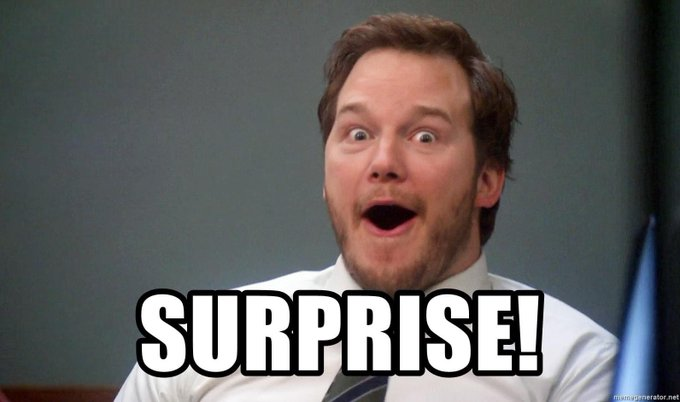

### 3. **¿Qué es lo que subirás a Kaggle?**

**Para subir a Kaggle la predicción esta tendrá que tener una forma específica.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [407]:
sample = pd.read_csv("data/sample_submission.csv")

In [408]:
sample.head()

,laptop_ID,Price_in_euros
0,209,1949.1
1,1281,805.0
2,1168,1101.0
3,1231,1293.8
4,1020,1832.6


In [409]:
sample.shape

(391, 2)

### 4. Mete tus predicciones en un dataframe llamado ``submission``.

In [410]:
#¿Cómo creamos la submission?
submission = pd.DataFrame({"laptop_ID": X_pred_transformado.index,"Price_in_euros": predictions_submit})

In [411]:
submission.head()

,laptop_ID,Price_in_euros
0,209,1639.966675
1,1281,318.418518
2,1168,378.101532
3,1231,738.178284
4,1020,899.652649


In [412]:
submission.shape

(391, 2)

### 5. Pásale el CHEQUEADOR para comprobar que efectivamente está listo para subir a Kaggle.

In [413]:
def chequeador(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.laptop_ID.all() == sample.laptop_ID.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://www.mihaileric.com/static/evaluation-meme-e0a350f278a36346e6d46b139b1d0da0-ed51e.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto del TA: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `test.csv`. Lloro.")

In [414]:
chequeador(submission)

You're ready to submit!
